In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

In [43]:
np.random.seed(42)

In [44]:
def parabolic(x, a, b, c):
    return a * x**2 + b * x + c

In [45]:
# Generate synthetic data
true_a = 2.0
true_b = 1.0
true_c = 0.5

sigma0 = 3.0

# Generate data
n_data = 10
n_sets = 1000

x = np.linspace(-5, 5, n_data)

In [46]:
all_data    = []
fit_results = []
chi2_values = []

In [47]:
for i in range(n_sets):
    # Generate synthetic data with noise
    y = parabolic(x, true_a, true_b, true_c) + np.random.normal(0, sigma0, size=x.shape)
    all_data.append(y)
    # Fit the data
    popt, pcov = curve_fit(parabolic, x, y)
    
    # Calculate chi-squared
    residuals = y - parabolic(x, *popt)
    chi2_value = np.sum((residuals / sigma0)**2)
    
    fit_results.append(popt)
    chi2_values.append(chi2_value)

In [48]:
all_data = np.array(all_data)
fit_results = np.array(fit_results)
chi2_values = np.array(chi2_values)

p < 0.05
Index: 60
Chi-square: 14.1291
Fitted parameters: a = 1.9778, b = 0.7572, c = 1.3412

0.4 < p < 0.6
Index: 4
Chi-square: 6.4121
Fitted parameters: a = 2.0462, b = 0.7519, c = -0.7291

p > 0.9
Index: 21
Chi-square: 2.0211
Fitted parameters: a = 2.0284, b = 0.5925, c = 0.9131



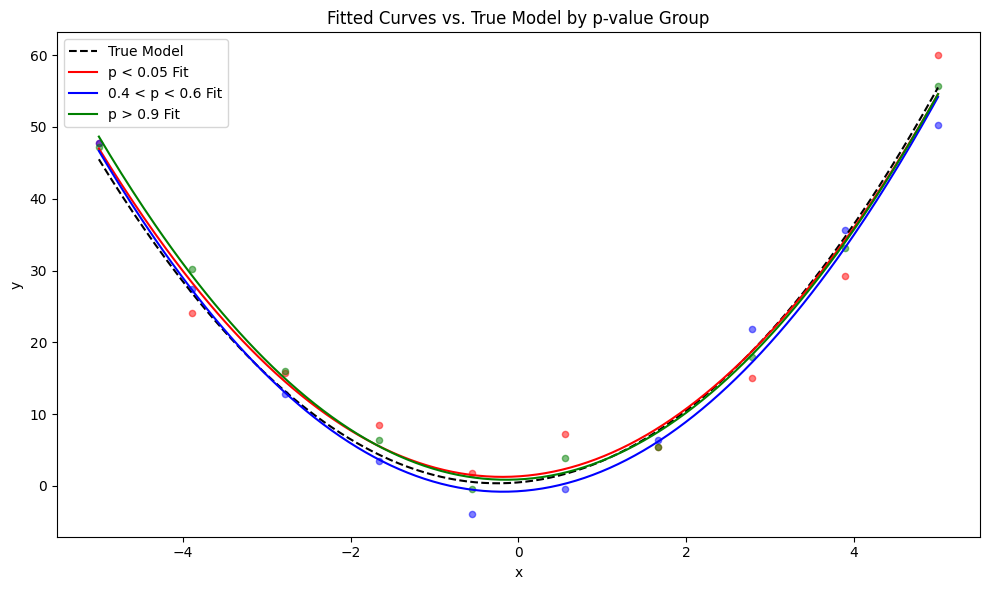

In [49]:
#計算每組fitting的p-value(自由度=資料點數-3個參數)
dof = n_data - 3
p_values = 1 - chi2.cdf(chi2_values, dof)

#選出三組範例：每個區間找一組符合條件的
def select_example(p_range_func):
    for i, p in enumerate(p_values):
        if p_range_func(p):
            return i, fit_results[i], all_data[i], chi2_values[i]
    return None

examples = {
    "p < 0.05": select_example(lambda p: p < 0.05),
    "0.4 < p < 0.6": select_example(lambda p: 0.4 < p < 0.6),
    "p > 0.9": select_example(lambda p: p > 0.9)
}

#印出範例的chi2與擬合參數
for label, (idx, params, data, chi2_val) in examples.items():
    print(f"{label}")
    print(f"Index: {idx}")
    print(f"Chi-square: {chi2_val:.4f}")
    print(f"Fitted parameters: a = {params[0]:.4f}, b = {params[1]:.4f}, c = {params[2]:.4f}\n")

#畫圖比較三組擬合曲線與true model
x_dense = np.linspace(min(x), max(x), 300)
true_y = true_a * x_dense**2 + true_b * x_dense + true_c

plt.figure(figsize=(10, 6))
plt.plot(x_dense, true_y, 'k--', label='True Model')

colors = ['red', 'blue', 'green']
for (label, (idx, params, data, _)), color in zip(examples.items(), colors):
    a, b, c = params
    y_fit = a * x_dense**2 + b * x_dense + c
    plt.plot(x_dense, y_fit, color=color, label=f'{label} Fit')
    plt.scatter(x, data, color=color, s=20, alpha=0.5)

plt.title("Fitted Curves vs. True Model by p-value Group")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.savefig("output1_5.pdf", transparent=True)
plt.show()
